In [1]:
import onnxruntime

In [2]:
sess_options = onnxruntime.SessionOptions()
sess = onnxruntime.InferenceSession('model/color_gen.onnx', sess_options)

In [3]:
input_name = sess.get_inputs()[0].name
print("input name", input_name)
input_shape = sess.get_inputs()[0].shape
print("input shape", input_shape)
input_type = sess.get_inputs()[0].type
print("input type", input_type)

input name l_img
input shape ['batch_size', 1, 256, 256]
input type tensor(float)


In [4]:
output_name = sess.get_outputs()[0].name
print("output name", output_name)
output_shape = sess.get_outputs()[0].shape
print("output shape", output_shape)
output_type = sess.get_outputs()[0].type
print("output type", output_type)

output name ab_img
output shape ['batch_size', 2, 256, 256]
output type tensor(float)


# Inference

In [5]:
import cv2
import numpy as np
from skimage.color import lab2rgb, rgb2lab
from matplotlib import pyplot as plt

In [6]:
img = cv2.imread('../data/images/Test/1C9EBJ 4.04.54 PM.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

lab_img = rgb2lab(img).astype(np.float32)

L = lab_img[:,:, 0] / 50. - 1.
L = np.expand_dims(L, axis=0)
L = np.expand_dims(L, axis=-1)

In [7]:
pred_ab = sess.run([output_name], {
    input_name: np.transpose(L, (0, 3, 1, 2))
})[0]

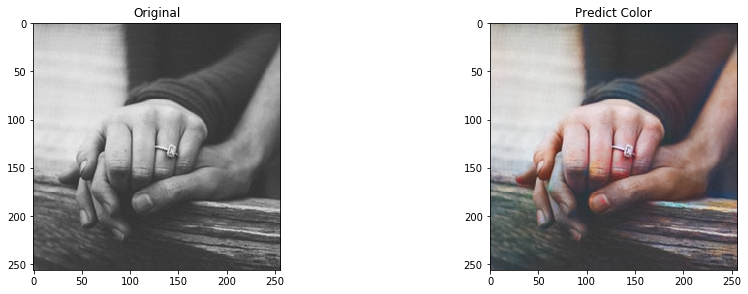

In [8]:
pred_ab = np.squeeze(pred_ab, axis=0) * 110

pred_ab = np.transpose(pred_ab, (1, 2, 0))

empty_img = np.zeros((256, 256, 3))
empty_img[:, :, 0] = lab_img[:, :, 0]
empty_img[:, :, 1:] = pred_ab

plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.title('Original')
plt.imshow(img)

plt.subplot(222)
plt.title('Predict Color')
plt.imshow(lab2rgb(empty_img))